# 華氏與攝氏溫度換算

## 產生隨機資料

In [1]:
# 載入套件
import numpy as np 
import tensorflow as tf 

# 隨機產生151筆資料
n = 151
C = np.linspace(-50, 100, n) 
F = C * (9/5) + 32

for i, x in enumerate(C):
    print(f"華氏(F)：{F[i]:.2f} , 攝氏(C)：{x:.0f}")

華氏(F)：-58.00 , 攝氏(C)：-50
華氏(F)：-56.20 , 攝氏(C)：-49
華氏(F)：-54.40 , 攝氏(C)：-48
華氏(F)：-52.60 , 攝氏(C)：-47
華氏(F)：-50.80 , 攝氏(C)：-46
華氏(F)：-49.00 , 攝氏(C)：-45
華氏(F)：-47.20 , 攝氏(C)：-44
華氏(F)：-45.40 , 攝氏(C)：-43
華氏(F)：-43.60 , 攝氏(C)：-42
華氏(F)：-41.80 , 攝氏(C)：-41
華氏(F)：-40.00 , 攝氏(C)：-40
華氏(F)：-38.20 , 攝氏(C)：-39
華氏(F)：-36.40 , 攝氏(C)：-38
華氏(F)：-34.60 , 攝氏(C)：-37
華氏(F)：-32.80 , 攝氏(C)：-36
華氏(F)：-31.00 , 攝氏(C)：-35
華氏(F)：-29.20 , 攝氏(C)：-34
華氏(F)：-27.40 , 攝氏(C)：-33
華氏(F)：-25.60 , 攝氏(C)：-32
華氏(F)：-23.80 , 攝氏(C)：-31
華氏(F)：-22.00 , 攝氏(C)：-30
華氏(F)：-20.20 , 攝氏(C)：-29
華氏(F)：-18.40 , 攝氏(C)：-28
華氏(F)：-16.60 , 攝氏(C)：-27
華氏(F)：-14.80 , 攝氏(C)：-26
華氏(F)：-13.00 , 攝氏(C)：-25
華氏(F)：-11.20 , 攝氏(C)：-24
華氏(F)：-9.40 , 攝氏(C)：-23
華氏(F)：-7.60 , 攝氏(C)：-22
華氏(F)：-5.80 , 攝氏(C)：-21
華氏(F)：-4.00 , 攝氏(C)：-20
華氏(F)：-2.20 , 攝氏(C)：-19
華氏(F)：-0.40 , 攝氏(C)：-18
華氏(F)：1.40 , 攝氏(C)：-17
華氏(F)：3.20 , 攝氏(C)：-16
華氏(F)：5.00 , 攝氏(C)：-15
華氏(F)：6.80 , 攝氏(C)：-14
華氏(F)：8.60 , 攝氏(C)：-13
華氏(F)：10.40 , 攝氏(C)：-12
華氏(F)：12.20 , 攝氏(C)：-11
華氏(F)：14.00 , 攝氏(C

## 建立模型

In [2]:
# 定義完全連接層(Dense)
# units：輸出神經元個數，input_shape：輸入神經元個數
layer1 = tf.keras.layers.Input([1]) 
layer2 = tf.keras.layers.Dense(units=1) 

# 神經網路包含一層完全連接層
model = tf.keras.Sequential([layer1, layer2])

# 定義模型的損失函數(loss)為 MSE，優化器(optimizer)為 adam
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## 模型訓練

In [3]:
history = model.fit(C, F, epochs=500, verbose=False)

## 訓練過程繪圖

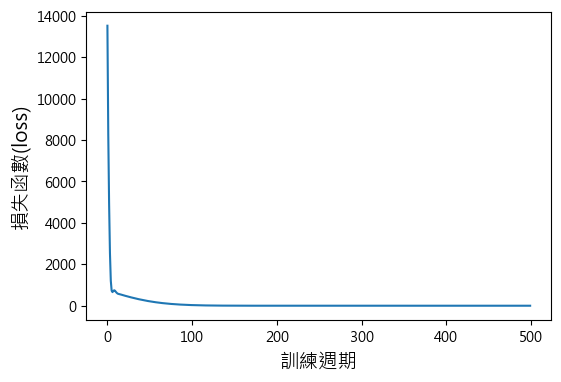

In [12]:
import matplotlib.pyplot as plt

# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 微軟正黑體
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6,4))
plt.xlabel('訓練週期', fontsize=14)
plt.ylabel("損失函數(loss)", fontsize=14)
plt.plot(history.history['loss'])
plt.show()

## 測試

In [5]:
C.shape

(151,)

In [6]:
y_pred = model.predict(np.array([100.0]), verbose=False)[0][0]
print(f"華氏(F)：{y_pred:.2f} , 攝氏(C)：100")

y_pred = model.predict(np.array([0.0]), verbose=False)[0][0]
print(f"華氏(F)：{y_pred:.2f} , 攝氏(C)：0")

華氏(F)：212.00 , 攝氏(C)：100
華氏(F)：32.00 , 攝氏(C)：0


## 取得模型參數

In [13]:
w = layer2.get_weights()[0][0][0]
b = layer2.get_weights()[1][0]

print(f"w：{w:.4f} , b：{b:.4f}")

w：1.8000 , b：31.9999
